In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("cleaned_dataset/cleaned_train.csv")

In [3]:
train_df.shape

(6368, 15)

In [4]:
train_df.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [5]:
train_df.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000
mean,25.309202,199.340609,0.643687,50.921168,0.139604,264.125000,10.141489,3529.118876,6389.533763,4560.970736
std,14.323355,170.275570,1.025092,29.091922,0.346603,122.551445,4.248329,2188.359887,3619.186655,2969.629150
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,-6062.470000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,166.000000,7.000000,1884.750000,4019.500000,2461.237728
50%,25.000000,132.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3157.500000,5634.000000,4210.384640
75%,37.000000,403.000000,2.000000,76.000000,0.000000,309.250000,14.000000,4691.000000,7927.750000,6156.039923
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


## **Before Outlier Removal**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

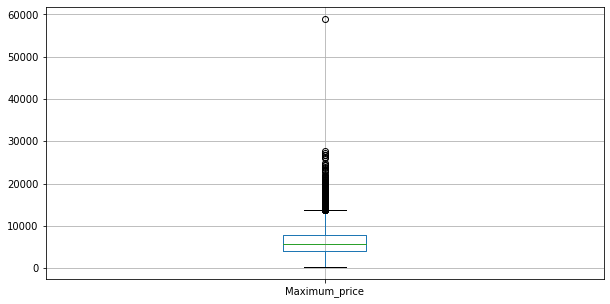

In [7]:
plt.figure(figsize=(10,5))
train_df.boxplot(column='Maximum_price')

<AxesSubplot:>

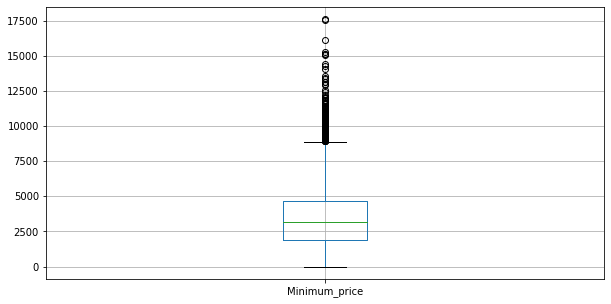

In [8]:
plt.figure(figsize=(10,5))
train_df.boxplot(column='Minimum_price')

<AxesSubplot:>

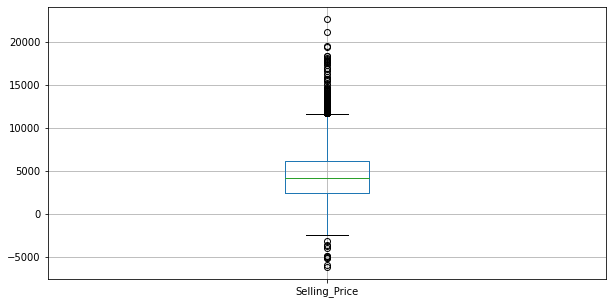

In [9]:
plt.figure(figsize=(10,5))
train_df.boxplot(column='Selling_Price')

<AxesSubplot:>

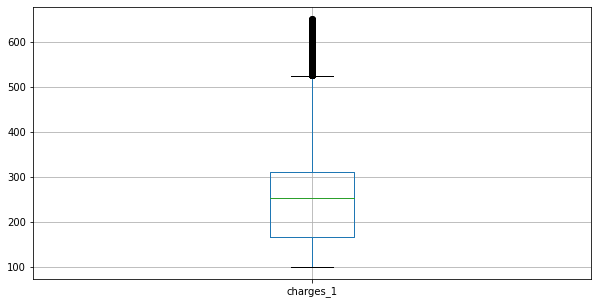

In [10]:
plt.figure(figsize=(10,5))
train_df.boxplot(column='charges_1')

<AxesSubplot:>

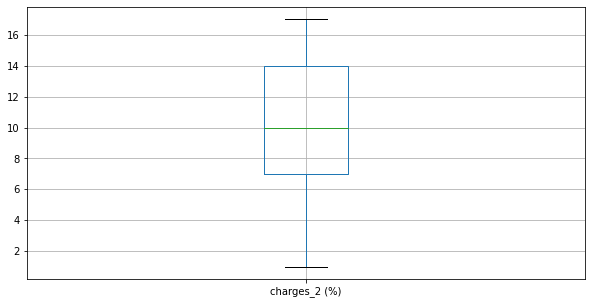

In [11]:
plt.figure(figsize=(10,5))
train_df.boxplot(column='charges_2 (%)')

## **Removing Outlier Using IQR**

In [12]:
def outlier_removal(column):
    sorted(column)
    Q1, Q3 = np.percentile(column, [25, 75])
    
    IQR = Q3 - Q1
    
    lower_value = Q1 - (1.5 * IQR)
    upper_value = Q3 + (1.5 * IQR)
    return lower_value, upper_value

In [13]:
lower, upper = outlier_removal(train_df.Minimum_price)
print(f'Lower value is {lower} and Upper Value is {upper}')

Lower value is -2324.625 and Upper Value is 8900.375


In [14]:
train_df.drop(train_df[ (train_df.Minimum_price > upper) | (train_df.Minimum_price < lower) ].index , inplace=True)

In [15]:
lower, upper = outlier_removal(train_df.Maximum_price)
print(f'Lower value is {lower} and Upper Value is {upper}')

Lower value is -1633.5 and Upper Value is 13290.5


In [16]:
train_df.drop(train_df[ (train_df.Maximum_price > upper) | (train_df.Maximum_price < lower) ].index , inplace=True)

In [17]:
lower, upper = outlier_removal(train_df.Selling_Price)
print(f'Lower value is {lower} and Upper Value is {upper}')

Lower value is -2749.267757499999 and Upper Value is 10904.4856545


In [18]:
train_df.drop(train_df[ (train_df.Selling_Price > upper) | (train_df.Selling_Price < lower) ].index , inplace=True)

In [19]:
lower, upper = outlier_removal(train_df.charges_1)
print(f'Lower value is {lower} and Upper Value is {upper}')

Lower value is -48.5 and Upper Value is 523.5


In [20]:
train_df.drop(train_df[ (train_df.charges_1 > upper) | (train_df.charges_1 < lower) ].index , inplace=True)

#### ***Plotting Box_Plot For Verification***

<AxesSubplot:>

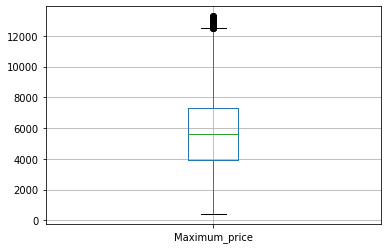

In [21]:
train_df.boxplot(column='Maximum_price')

<AxesSubplot:>

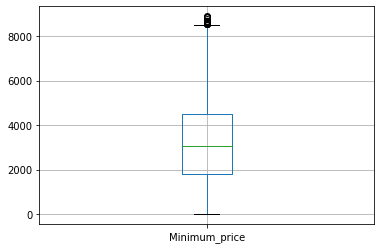

In [22]:
train_df.boxplot(column='Minimum_price')

<AxesSubplot:>

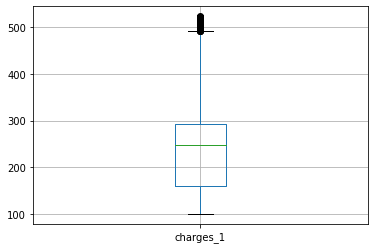

In [23]:
train_df.boxplot(column='charges_1')